In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import genextreme, kendalltau
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeSVD
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# üìÇ Carregar dados
caminho_arquivo = "C:/Python/Waves/maputoo.xlsx"
df = pd.read_excel(caminho_arquivo)

# üìã Corrigir colunas
df.columns = ['YEAR', 'DIA_MES', 'T2M_MAX', 'T2M_MIN']

# üìÖ Corrigir Datas
df['DIA_MES'] = pd.to_datetime(df['DIA_MES'])

def corrigir_ano(row):
    try:
        return row['DIA_MES'].replace(year=int(row['YEAR']))
    except ValueError:
        if row['DIA_MES'].month == 2 and row['DIA_MES'].day == 29:
            return row['DIA_MES'].replace(day=28, year=int(row['YEAR']))
        else:
            return pd.NaT

df['DATA_COMPLETA'] = df.apply(corrigir_ano, axis=1)
df = df.dropna(subset=['DATA_COMPLETA'])

# üìà Criar T2M_MED
df['T2M_MED'] = (df['T2M_MAX'] + df['T2M_MIN']) / 2


In [43]:
# üìã Verificar erros f√≠sicos (Tmin > Tmax)
erros_fisicos = df[df['T2M_MIN'] > df['T2M_MAX']]
print(f"Erros f√≠sicos detectados: {len(erros_fisicos)}")

# üìã Verificar valores extremos f√≠sicos (>50¬∞C ou <-10¬∞C para Maputo)
outliers = df[(df['T2M_MAX'] > 50) | (df['T2M_MIN'] < -10)]
print(f"Valores extremos fora da climatologia plaus√≠vel: {len(outliers)}")

# üìã Detectar duplicatas
duplicados = df[df.duplicated(subset=['DATA_COMPLETA'])]
print(f"Registros duplicados: {len(duplicados)}")

# üìã Verificar buracos na s√©rie temporal
df = df.sort_values('DATA_COMPLETA')
df['DIFERENCA'] = df['DATA_COMPLETA'].diff().dt.days
buracos = df[df['DIFERENCA'] > 1]
print(f"Buracos (dias ausentes) na s√©rie: {len(buracos)}")

# üìã Remover duplicados
df = df.drop_duplicates(subset=['DATA_COMPLETA'])
print(f"Ap√≥s remo√ß√£o de duplicados, total de registros: {len(df)}")


Erros f√≠sicos detectados: 0
Valores extremos fora da climatologia plaus√≠vel: 0
Registros duplicados: 20
Buracos (dias ausentes) na s√©rie: 20
Ap√≥s remo√ß√£o de duplicados, total de registros: 14621


In [44]:
from fancyimpute import IterativeSVD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# üìã Normalizar vari√°veis
variaveis = ['T2M_MAX', 'T2M_MIN', 'T2M_MED']
dados_norm = StandardScaler().fit_transform(df[variaveis])

# üìã An√°lise de PCA
pca = PCA()
pca.fit(dados_norm)

variancia_acumulada = np.cumsum(pca.explained_variance_ratio_)

# üìã Mostrar n√∫mero de componentes para 90% da vari√¢ncia
n_componentes_90 = np.argmax(variancia_acumulada >= 0.90) + 1
print(f"N√∫mero de componentes para explicar ‚â•90% da vari√¢ncia: {n_componentes_90}")

# üìã Imputa√ß√£o via IterativeSVD (com rank=2)
imputer = IterativeSVD(rank=2)
dados_imputados = imputer.fit_transform(df[variaveis])

# üìã Atualizar valores imputados
df['T2M_MAX'] = dados_imputados[:, 0]
df['T2M_MIN'] = dados_imputados[:, 1]
df['T2M_MED'] = dados_imputados[:, 2]


N√∫mero de componentes para explicar ‚â•90% da vari√¢ncia: 2
[IterativeSVD] Iter 1: observed MAE=0.930681
[IterativeSVD] Iter 2: observed MAE=0.000000
[IterativeSVD] Iter 3: observed MAE=0.000000
[IterativeSVD] Iter 4: observed MAE=0.000000
[IterativeSVD] Iter 5: observed MAE=0.000000
[IterativeSVD] Iter 6: observed MAE=0.000000
[IterativeSVD] Iter 7: observed MAE=0.000000
[IterativeSVD] Iter 8: observed MAE=0.000000
[IterativeSVD] Iter 9: observed MAE=0.000000
[IterativeSVD] Iter 10: observed MAE=0.000000
[IterativeSVD] Iter 11: observed MAE=0.000000
[IterativeSVD] Iter 12: observed MAE=0.000000
[IterativeSVD] Iter 13: observed MAE=0.000000
[IterativeSVD] Iter 14: observed MAE=0.000000
[IterativeSVD] Iter 15: observed MAE=0.000000
[IterativeSVD] Iter 16: observed MAE=0.000000
[IterativeSVD] Iter 17: observed MAE=0.000000
[IterativeSVD] Iter 18: observed MAE=0.000000
[IterativeSVD] Iter 19: observed MAE=0.000000
[IterativeSVD] Iter 20: observed MAE=0.000000
[IterativeSVD] Iter 21: obse

c:\Users\Dell\anaconda3\Lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[IterativeSVD] Iter 117: observed MAE=0.000000
[IterativeSVD] Iter 118: observed MAE=0.000000
[IterativeSVD] Iter 119: observed MAE=0.000000
[IterativeSVD] Iter 120: observed MAE=0.000000
[IterativeSVD] Iter 121: observed MAE=0.000000
[IterativeSVD] Iter 122: observed MAE=0.000000
[IterativeSVD] Iter 123: observed MAE=0.000000
[IterativeSVD] Iter 124: observed MAE=0.000000
[IterativeSVD] Iter 125: observed MAE=0.000000
[IterativeSVD] Iter 126: observed MAE=0.000000
[IterativeSVD] Iter 127: observed MAE=0.000000
[IterativeSVD] Iter 128: observed MAE=0.000000
[IterativeSVD] Iter 129: observed MAE=0.000000
[IterativeSVD] Iter 130: observed MAE=0.000000
[IterativeSVD] Iter 131: observed MAE=0.000000
[IterativeSVD] Iter 132: observed MAE=0.000000
[IterativeSVD] Iter 133: observed MAE=0.000000
[IterativeSVD] Iter 134: observed MAE=0.000000
[IterativeSVD] Iter 135: observed MAE=0.000000
[IterativeSVD] Iter 136: observed MAE=0.000000
[IterativeSVD] Iter 137: observed MAE=0.000000
[IterativeSVD

In [45]:
# üìã 1. Primeiro calcular o DOY (se ainda n√£o fez)
df['DOY'] = df['DATA_COMPLETA'].dt.dayofyear

# üìã 2. Calcular a climatologia di√°ria
climatologia = df.groupby('DOY').agg(
    Normal_Tmax=('T2M_MAX', 'mean'),
    Desvio_Tmax=('T2M_MAX', 'std'),
    Percentil90_Tmax=('T2M_MAX', lambda x: np.percentile(x, 90)),
    Percentil10_Tmax=('T2M_MAX', lambda x: np.percentile(x, 10)),

    Normal_Tmin=('T2M_MIN', 'mean'),
    Desvio_Tmin=('T2M_MIN', 'std'),
    Percentil90_Tmin=('T2M_MIN', lambda x: np.percentile(x, 90)),
    Percentil10_Tmin=('T2M_MIN', lambda x: np.percentile(x, 10)),

    Normal_Tmed=('T2M_MED', 'mean'),
    Desvio_Tmed=('T2M_MED', 'std'),
    Percentil90_Tmed=('T2M_MED', lambda x: np.percentile(x, 90)),
    Percentil10_Tmed=('T2M_MED', lambda x: np.percentile(x, 10))
).reset_index()

# üìã 3. Integrar a climatologia no dataframe principal
df = df.merge(climatologia, on='DOY', how='left')


In [46]:
# üìã Anomalias em rela√ß√£o √† climatologia
df['Anomalia_Tmax'] = df['T2M_MAX'] - df['Normal_Tmax']
df['Anomalia_Tmin'] = df['T2M_MIN'] - df['Normal_Tmin']
df['Anomalia_Tmed'] = df['T2M_MED'] - df['Normal_Tmed']


In [47]:
# üìã Defini√ß√£o de extremos
df['Extremo_Calor_Tmax'] = df['T2M_MAX'] > df['Percentil90_Tmax']
df['Extremo_Fr√≠o_Tmin'] = df['T2M_MIN'] < df['Percentil10_Tmin']

# üìã Extremos combinados (se quiser usar depois)
df['Evento_Extremo'] = df['Extremo_Calor_Tmax'] | df['Extremo_Fr√≠o_Tmin']

# üìã Verifica√ß√£o
print("‚úÖ Extremos de calor detectados:", df['Extremo_Calor_Tmax'].sum())
print("‚úÖ Extremos de frio detectados:", df['Extremo_Fr√≠o_Tmin'].sum())


‚úÖ Extremos de calor detectados: 1456
‚úÖ Extremos de frio detectados: 1452


In [48]:
from scipy.stats import genextreme

# üìã Agrupar m√°ximos anuais (para calor extremo)
tmax_anuais = df.groupby('YEAR')['T2M_MAX'].max()

# üìã Agrupar m√≠nimos anuais (para frio extremo)
tmin_anuais = df.groupby('YEAR')['T2M_MIN'].min()

# üìã Ajustar GEV para Tmax (calor extremo)
shape_max, loc_max, scale_max = genextreme.fit(tmax_anuais)
print(f"üî¥ GEV Tmax: shape={shape_max:.4f}, loc={loc_max:.2f}, scale={scale_max:.2f}")

# üìã Ajustar GEV para Tmin (frio extremo)
shape_min, loc_min, scale_min = genextreme.fit(-tmin_anuais)  # Inverter o sinal para frio
print(f"üîµ GEV Tmin (invertido): shape={shape_min:.4f}, loc={-loc_min:.2f}, scale={scale_min:.2f}")


üî¥ GEV Tmax: shape=0.4929, loc=39.11, scale=1.76
üîµ GEV Tmin (invertido): shape=0.7021, loc=11.20, scale=1.47


In [49]:
# üìã Definir tempos de retorno
tempos_retorno = np.array([2, 5, 10, 20, 50, 100])

# üìã Configurar Bootstrap
n_bootstrap = 2000
np.random.seed(42)


In [51]:
return_levels_bootstrap_max = []

for _ in range(n_bootstrap):
    simulados = genextreme.rvs(shape_max, loc_max, scale_max, size=len(tmax_anuais))
    try:
        shape_b, loc_b, scale_b = genextreme.fit(simulados)
        levels = genextreme.ppf(1-1/tempos_retorno, shape_b, loc_b, scale_b)
        return_levels_bootstrap_max.append(levels)
    except:
        continue

return_levels_bootstrap_max = np.array(return_levels_bootstrap_max)

# üìã Calcular Intervalos de Confian√ßa Tmax
lower_bounds_max = np.percentile(return_levels_bootstrap_max, 2.5, axis=0)
upper_bounds_max = np.percentile(return_levels_bootstrap_max, 97.5, axis=0)

# üìã N√≠veis Centrais Tmax
central_levels_max = genextreme.ppf(1-1/tempos_retorno, shape_max, loc_max, scale_max)


In [52]:
return_levels_bootstrap_min = []

for _ in range(n_bootstrap):
    simulados = genextreme.rvs(shape_min, loc_min, scale_min, size=len(tmin_anuais))
    try:
        shape_b, loc_b, scale_b = genextreme.fit(simulados)
        levels_invertidos = genextreme.ppf(1-1/tempos_retorno, shape_b, loc_b, scale_b)
        levels_real = -levels_invertidos  # Corrigir o sinal de volta para temperaturas reais
        return_levels_bootstrap_min.append(levels_real)
    except:
        continue

return_levels_bootstrap_min = np.array(return_levels_bootstrap_min)

# üìã Calcular Intervalos de Confian√ßa Tmin
lower_bounds_min = np.percentile(return_levels_bootstrap_min, 2.5, axis=0)
upper_bounds_min = np.percentile(return_levels_bootstrap_min, 97.5, axis=0)

# üìã N√≠veis Centrais Tmin
central_levels_min = -genextreme.ppf(1-1/tempos_retorno, shape_min, loc_min, scale_min)


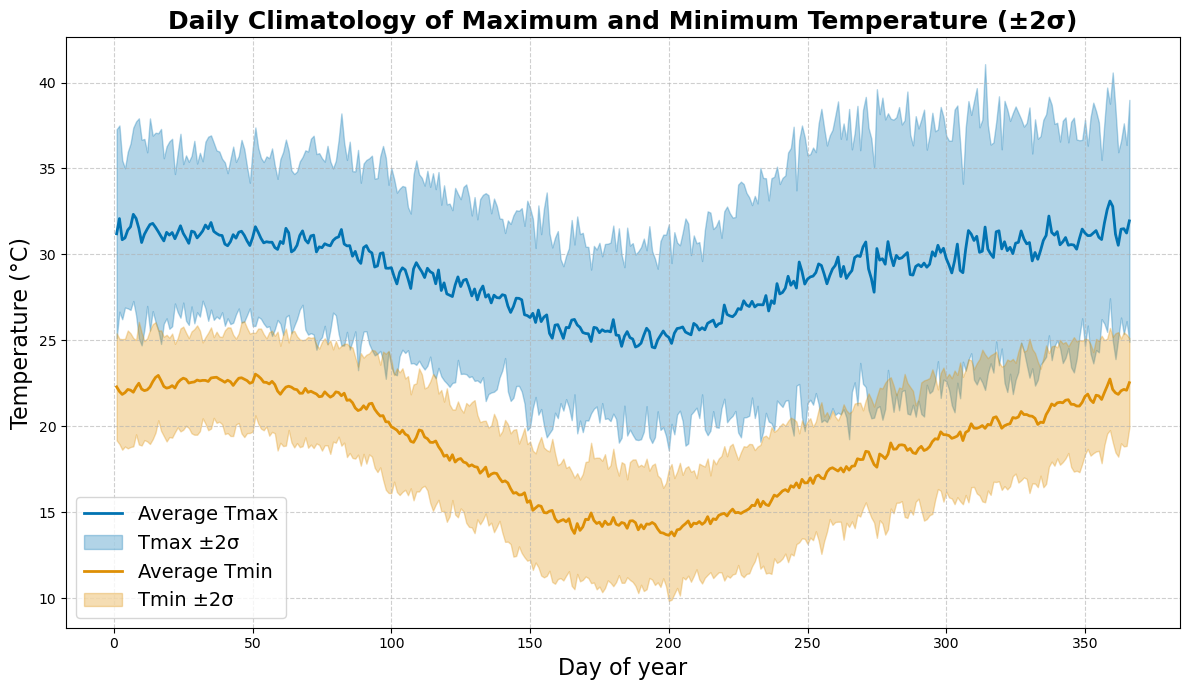

In [53]:
plt.figure(figsize=(12,7))
colors = sns.color_palette("colorblind")

plt.plot(climatologia['DOY'], climatologia['Normal_Tmax'], color=colors[0], label='Average Tmax', linewidth=2)
plt.fill_between(climatologia['DOY'],
                 climatologia['Normal_Tmax'] - 2 * climatologia['Desvio_Tmax'],
                 climatologia['Normal_Tmax'] + 2 * climatologia['Desvio_Tmax'],
                 color=colors[0], alpha=0.3, label='Tmax ¬±2œÉ')

plt.plot(climatologia['DOY'], climatologia['Normal_Tmin'], color=colors[1], label='Average Tmin', linewidth=2)
plt.fill_between(climatologia['DOY'],
                 climatologia['Normal_Tmin'] - 2 * climatologia['Desvio_Tmin'],
                 climatologia['Normal_Tmin'] + 2 * climatologia['Desvio_Tmin'],
                 color=colors[1], alpha=0.3, label='Tmin ¬±2œÉ')

plt.title('Daily Climatology of Maximum and Minimum Temperature (¬±2œÉ)', fontsize=18, weight='bold')
plt.xlabel('Day of year', fontsize=16)
plt.ylabel('Temperature (¬∞C)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Climatologia_Tmax_Tmin.png", dpi=300)
plt.show()


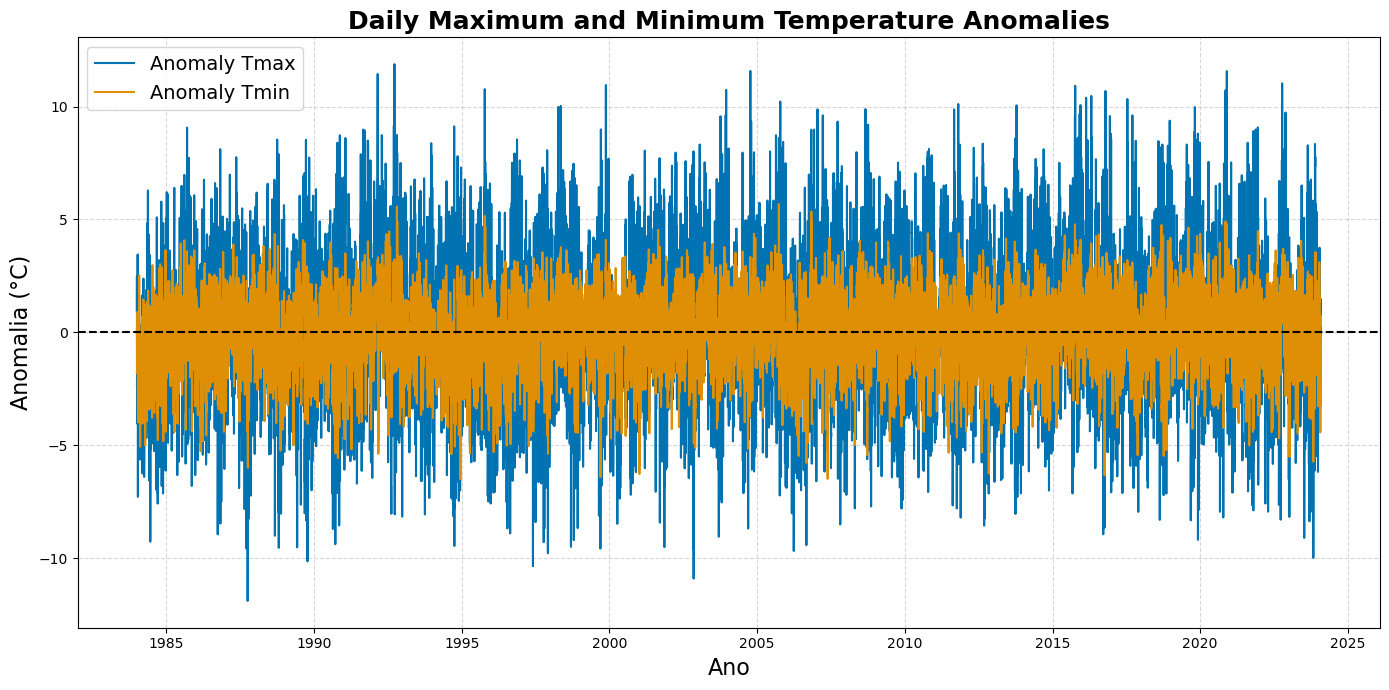

In [54]:
plt.figure(figsize=(14,7))

plt.plot(df['DATA_COMPLETA'], df['Anomalia_Tmax'], label='Anomaly Tmax', color=colors[0])
plt.plot(df['DATA_COMPLETA'], df['Anomalia_Tmin'], label='Anomaly Tmin', color=colors[1])

plt.axhline(0, color='black', linestyle='--')
plt.title('Daily Maximum and Minimum Temperature Anomalies', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Anomalia (¬∞C)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Anomalias_Tmax_Tmin.png", dpi=300)
plt.show()


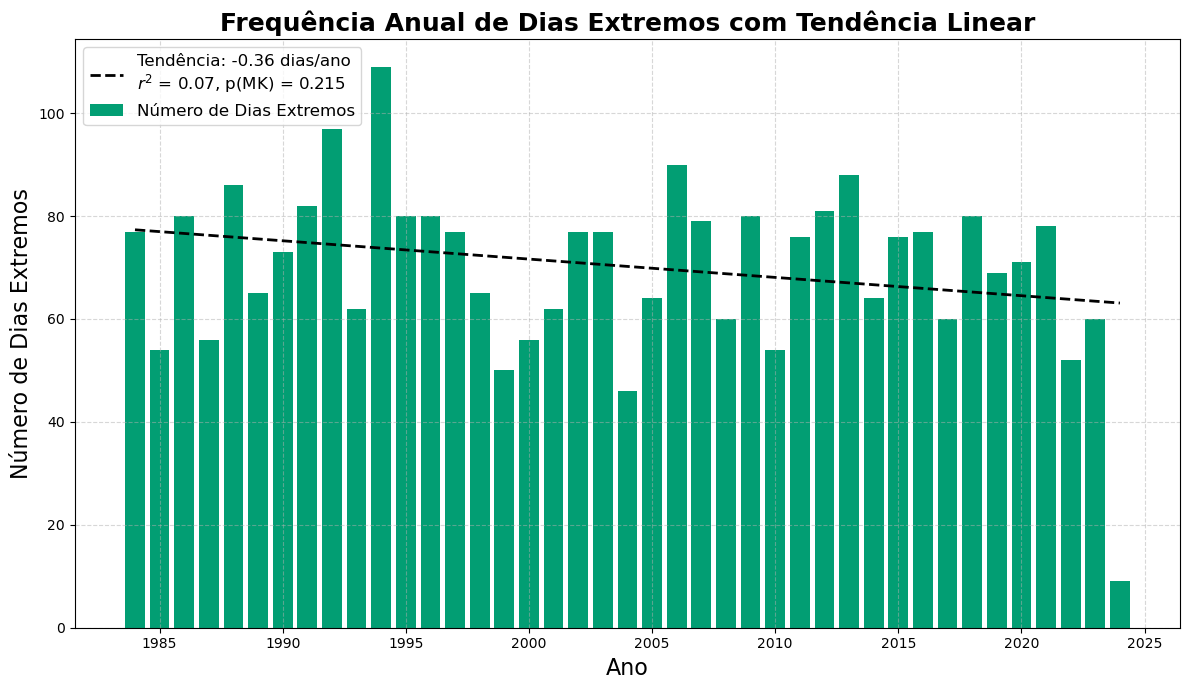

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymannkendall as mk

# üìã Frequ√™ncia de dias extremos por ano
extremos_ano = df[df['Evento_Extremo']].groupby('YEAR').size()

# üìã Ajuste de tend√™ncia (M√≠nimos Quadrados)
coef = np.polyfit(extremos_ano.index, extremos_ano.values, 1)
trendline = np.poly1d(coef)

# üìã Coeficiente de determina√ß√£o (r¬≤)
correlacao = np.corrcoef(extremos_ano.index, extremos_ano.values)[0,1]
r_squared = correlacao**2

# üìã Teste de Mann-Kendall
resultado_mk = mk.original_test(extremos_ano)

# üìà Gr√°fico
colors = sns.color_palette("colorblind")

plt.figure(figsize=(12,7))
plt.bar(extremos_ano.index, extremos_ano.values, color=colors[2], label='N√∫mero de Dias Extremos')
plt.plot(extremos_ano.index, trendline(extremos_ano.index), color='black', linestyle='--', linewidth=2,
         label=f'Tend√™ncia: {coef[0]:.2f} dias/ano\n$r^2$ = {r_squared:.2f}, p(MK) = {resultado_mk.p:.3f}')

plt.title('Frequ√™ncia Anual de Dias Extremos com Tend√™ncia Linear', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('N√∫mero de Dias Extremos', fontsize=16)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# üìÇ Salvar
plt.savefig("Frequencia_Anual_Extremos_Tendencia_Completa.png", dpi=300)
plt.show()


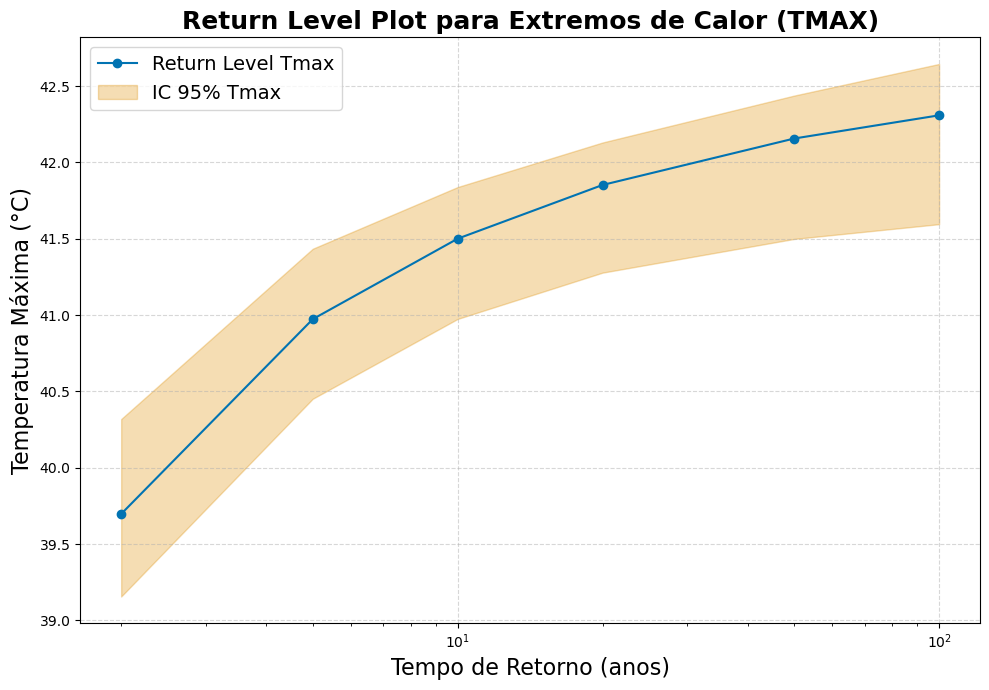

In [56]:
plt.figure(figsize=(10,7))
plt.plot(tempos_retorno, central_levels_max, marker='o', linestyle='-', color=colors[0], label='Return Level Tmax')
plt.fill_between(tempos_retorno, lower_bounds_max, upper_bounds_max, color=colors[1], alpha=0.3, label='IC 95% Tmax')

plt.xscale('log')
plt.title('Return Level Plot para Extremos de Calor (TMAX)', fontsize=18, weight='bold')
plt.xlabel('Tempo de Retorno (anos)', fontsize=16)
plt.ylabel('Temperatura M√°xima (¬∞C)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Return_Level_TMAX.png", dpi=300)
plt.show()


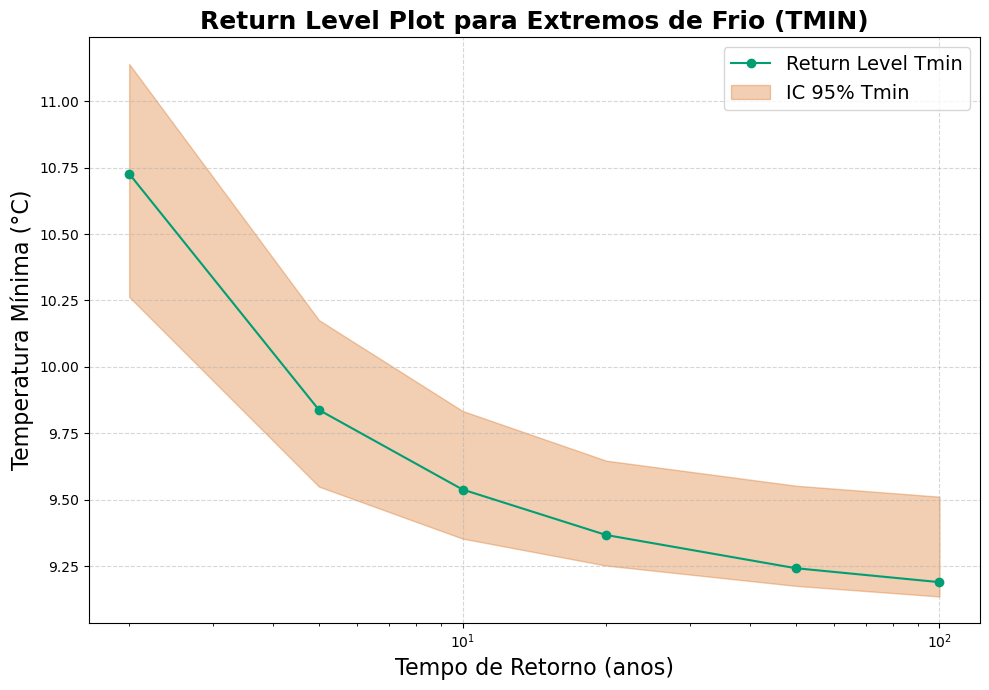

In [57]:
plt.figure(figsize=(10,7))
plt.plot(tempos_retorno, central_levels_min, marker='o', linestyle='-', color=colors[2], label='Return Level Tmin')
plt.fill_between(tempos_retorno, lower_bounds_min, upper_bounds_min, color=colors[3], alpha=0.3, label='IC 95% Tmin')

plt.xscale('log')
plt.title('Return Level Plot para Extremos de Frio (TMIN)', fontsize=18, weight='bold')
plt.xlabel('Tempo de Retorno (anos)', fontsize=16)
plt.ylabel('Temperatura M√≠nima (¬∞C)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Return_Level_TMIN.png", dpi=300)
plt.show()


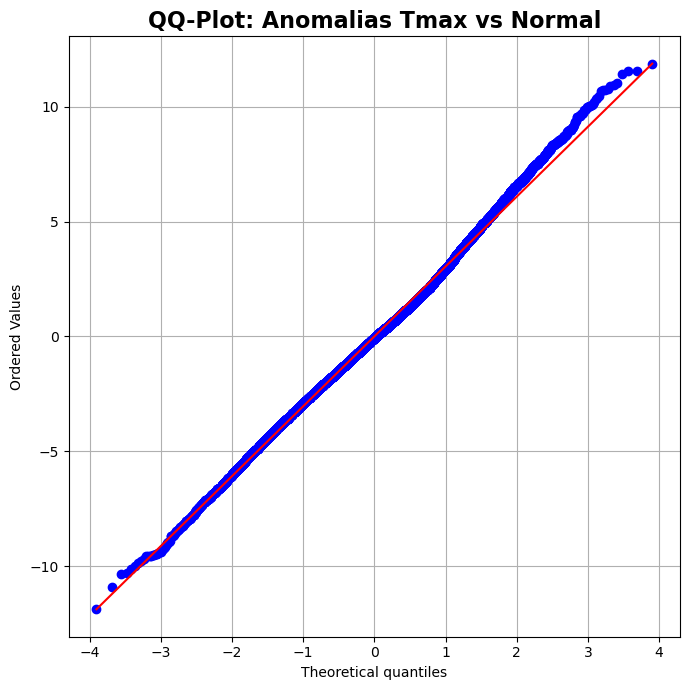

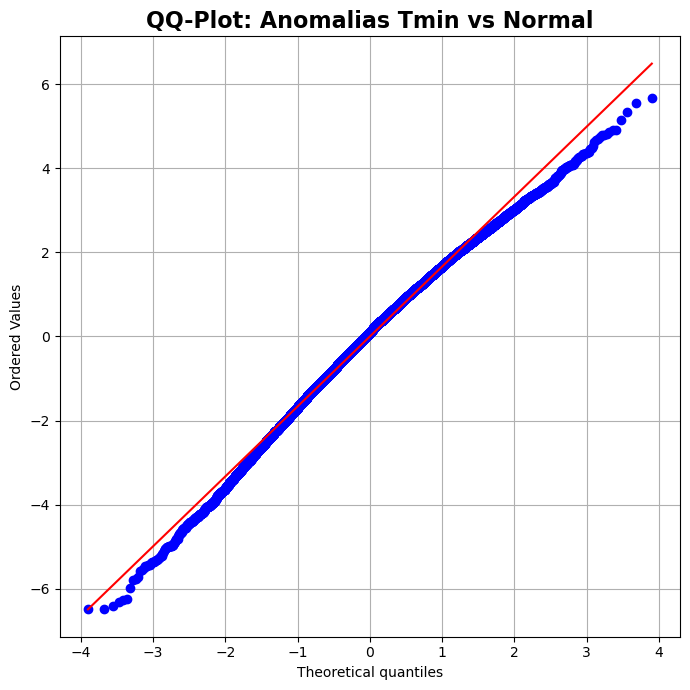

In [58]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# üìã QQ-Plot para verificar normalidade das anomalias Tmax
plt.figure(figsize=(7,7))
stats.probplot(df['Anomalia_Tmax'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot: Anomalias Tmax vs Normal', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig("QQPlot_Anomalia_Tmax_Normal.png", dpi=300)
plt.show()

# üìã QQ-Plot para verificar normalidade das anomalias Tmin
plt.figure(figsize=(7,7))
stats.probplot(df['Anomalia_Tmin'].dropna(), dist="norm", plot=plt)
plt.title('QQ-Plot: Anomalias Tmin vs Normal', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig("QQPlot_Anomalia_Tmin_Normal.png", dpi=300)
plt.show()


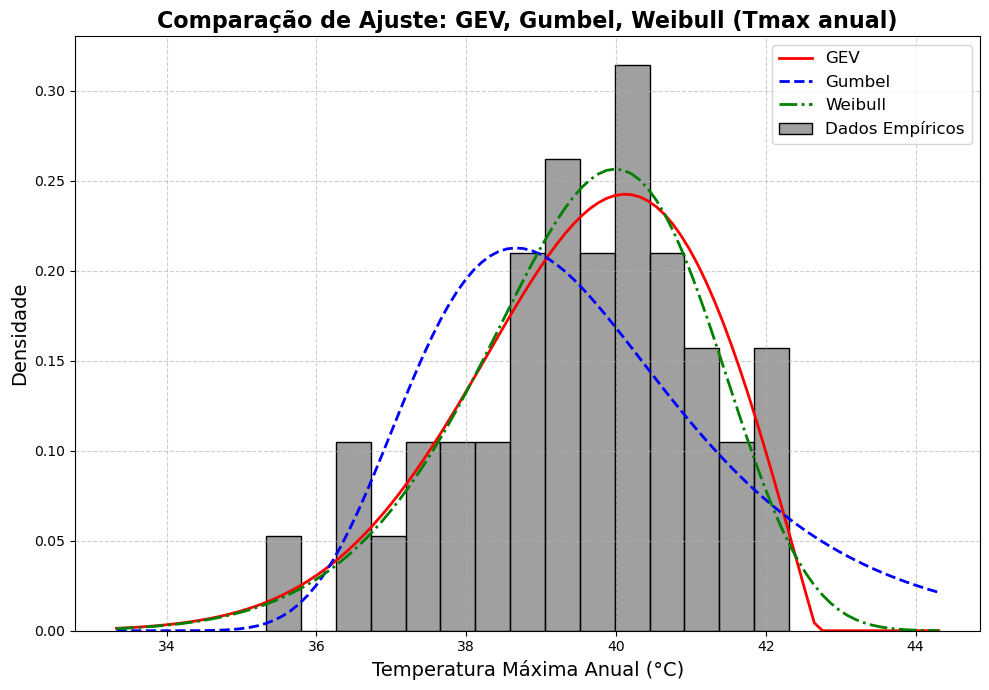

In [59]:
# üìã Ajuste de distribui√ß√µes alternativas para Tmax anual

from scipy.stats import gumbel_r, weibull_min

# Ajuste Gumbel
params_gumbel = gumbel_r.fit(tmax_anuais)
# Ajuste Weibull
params_weibull = weibull_min.fit(tmax_anuais)

# Valores para o gr√°fico
x = np.linspace(tmax_anuais.min()-2, tmax_anuais.max()+2, 100)

plt.figure(figsize=(10,7))
sns.histplot(tmax_anuais, kde=False, stat='density', bins=15, color='gray', label='Dados Emp√≠ricos')

# GEV j√° ajustado anteriormente
plt.plot(x, genextreme.pdf(x, shape_max, loc_max, scale_max), label='GEV', color='red', linewidth=2)
plt.plot(x, gumbel_r.pdf(x, *params_gumbel), label='Gumbel', color='blue', linestyle='--', linewidth=2)
plt.plot(x, weibull_min.pdf(x, *params_weibull), label='Weibull', color='green', linestyle='-.', linewidth=2)

plt.title('Compara√ß√£o de Ajuste: GEV, Gumbel, Weibull (Tmax anual)', fontsize=16, weight='bold')
plt.xlabel('Temperatura M√°xima Anual (¬∞C)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Comparacao_Distribuicoes_Tmax.png", dpi=300)
plt.show()


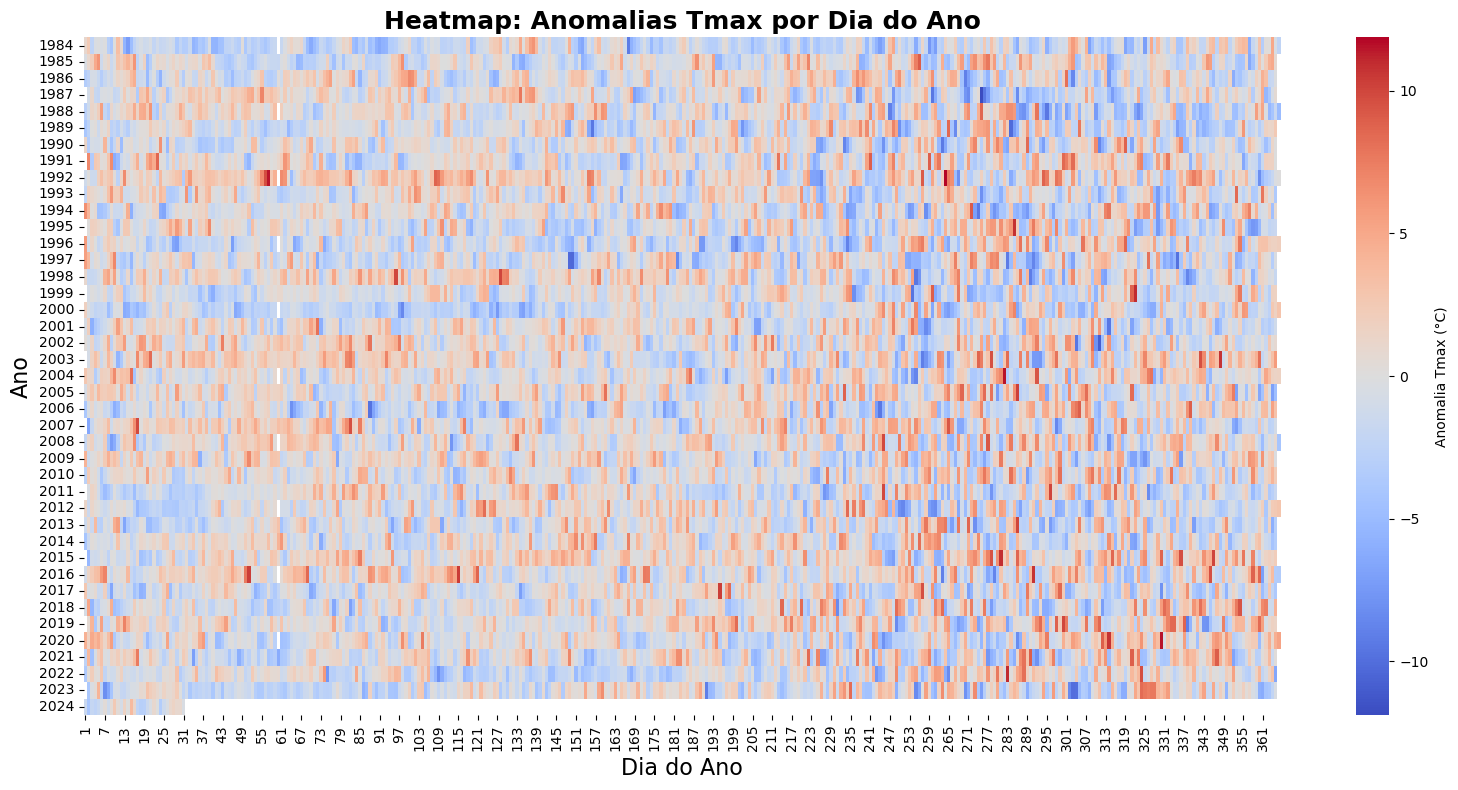

In [60]:
# üìã Pivotar dados para formar matriz ano x DOY
heatmap_data = df.pivot_table(index='YEAR', columns='DOY', values='Anomalia_Tmax')

plt.figure(figsize=(16,8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, cbar_kws={'label': 'Anomalia Tmax (¬∞C)'})
plt.title('Heatmap: Anomalias Tmax por Dia do Ano', fontsize=18, weight='bold')
plt.xlabel('Dia do Ano', fontsize=16)
plt.ylabel('Ano', fontsize=16)
plt.tight_layout()
plt.savefig("Heatmap_Anomalia_Tmax.png", dpi=300)
plt.show()


<Figure size 1000x500 with 0 Axes>

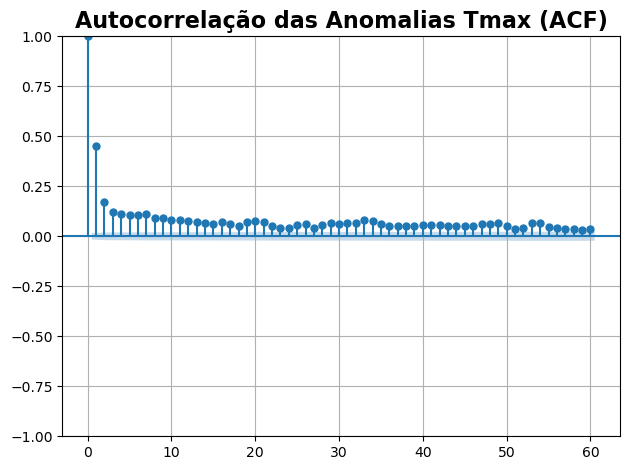

<Figure size 1000x500 with 0 Axes>

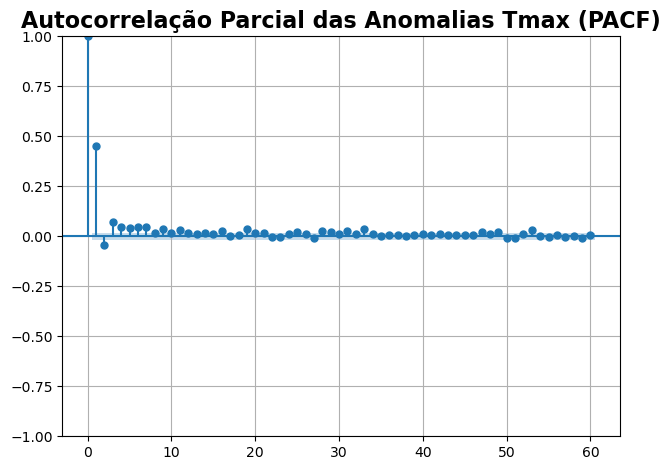

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# üìã S√©rie de anomalias Tmax
serie_tmax = df.set_index('DATA_COMPLETA')['Anomalia_Tmax'].dropna()

# üìã ACF
plt.figure(figsize=(10,5))
plot_acf(serie_tmax, lags=60)
plt.title('Autocorrela√ß√£o das Anomalias Tmax (ACF)', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig("ACF_Anomalia_Tmax.png", dpi=300)
plt.show()

# üìã PACF
plt.figure(figsize=(10,5))
plot_pacf(serie_tmax, lags=60)
plt.title('Autocorrela√ß√£o Parcial das Anomalias Tmax (PACF)', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig("PACF_Anomalia_Tmax.png", dpi=300)
plt.show()


In [63]:
!pip install ruptures

c:\Users\Dell\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=7>
  return process_handler(cmd, _system_body)
c:\Users\Dell\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
c:\Users\Dell\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)


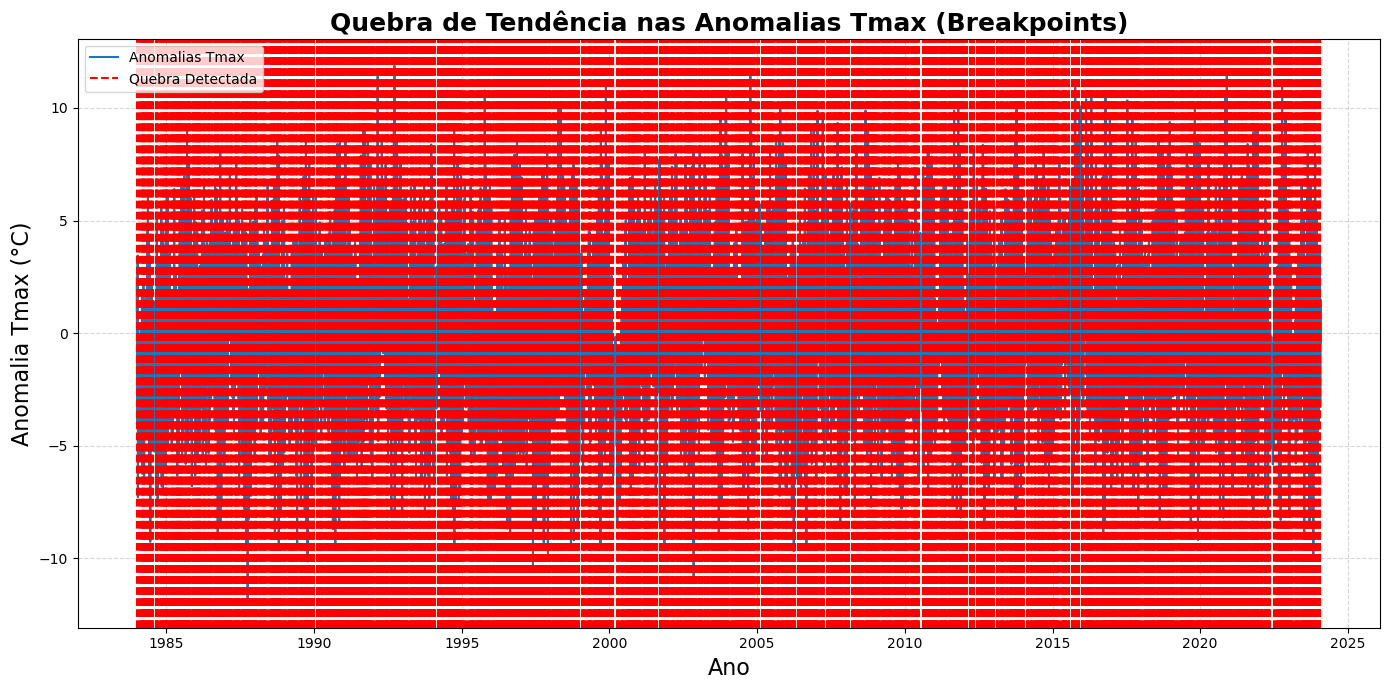

In [64]:
import ruptures as rpt

# üìã Detec√ß√£o de Quebras (Pelt, L2)
signal = serie_tmax.values
algo = rpt.Pelt(model="l2").fit(signal)
result = algo.predict(pen=3)

# üìã Plot
plt.figure(figsize=(14,7))
plt.plot(serie_tmax.index, serie_tmax.values, label='Anomalias Tmax')
for bp in result[:-1]:  # √∫ltimo √© o final da s√©rie
    plt.axvline(serie_tmax.index[bp], color='red', linestyle='--', label='Quebra Detectada' if bp==result[0] else "")

plt.title('Quebra de Tend√™ncia nas Anomalias Tmax (Breakpoints)', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Anomalia Tmax (¬∞C)', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Breakpoints_Anomalia_Tmax.png", dpi=300)
plt.show()


In [65]:
# üìã J√° temos no df:
# - df['Extremo_Calor_Tmax']
# - df['Extremo_Fr√≠o_Tmin']

# Frequ√™ncia anual de ondas de calor
freq_calor = df[df['Extremo_Calor_Tmax']].groupby('YEAR').size()

# Frequ√™ncia anual de ondas de frio
freq_frio = df[df['Extremo_Fr√≠o_Tmin']].groupby('YEAR').size()

# Preencher anos ausentes com zero (caso existam anos sem extremos)
freq_calor = freq_calor.reindex(range(df['YEAR'].min(), df['YEAR'].max()+1), fill_value=0)
freq_frio = freq_frio.reindex(range(df['YEAR'].min(), df['YEAR'].max()+1), fill_value=0)

# üìã Verificar
print("‚úÖ Frequ√™ncia de Ondas de Calor e Frio separadas calculadas.")


‚úÖ Frequ√™ncia de Ondas de Calor e Frio separadas calculadas.


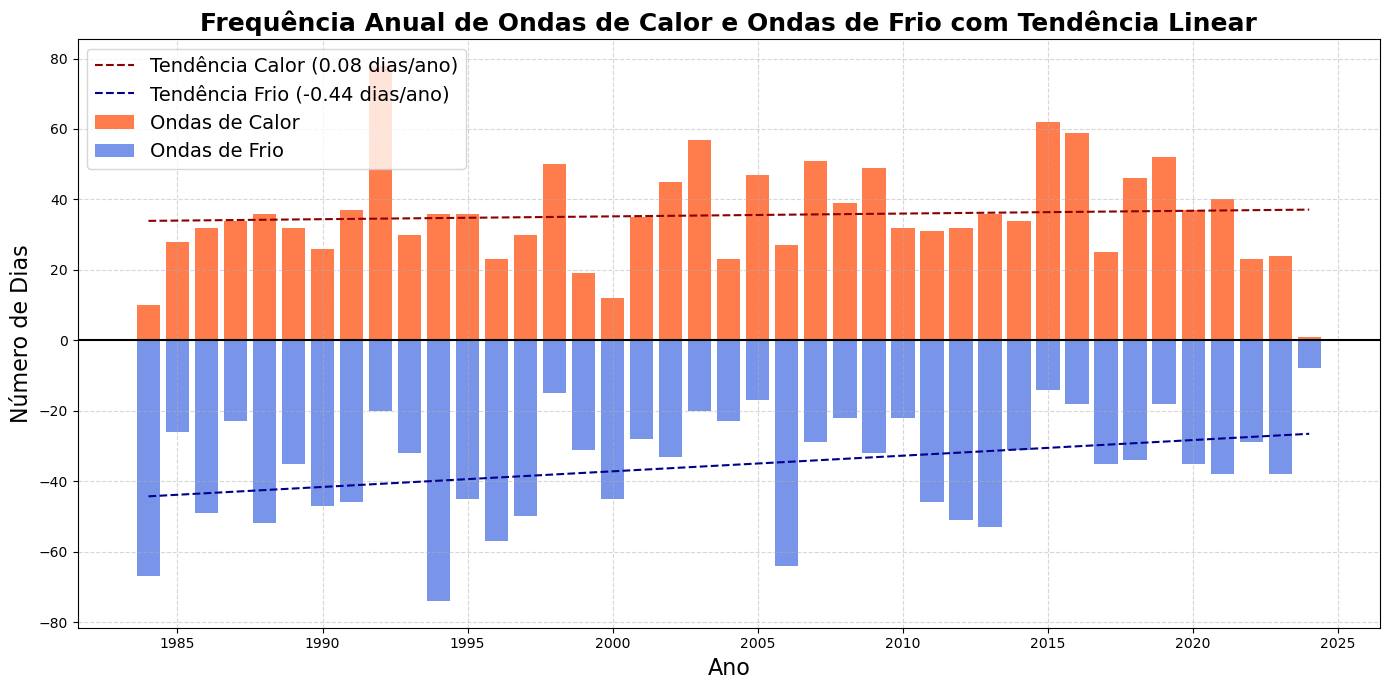

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# üìã Tend√™ncia Linear Calor
coef_calor = np.polyfit(freq_calor.index, freq_calor.values, 1)
trendline_calor = np.poly1d(coef_calor)

# üìã Tend√™ncia Linear Frio
coef_frio = np.polyfit(freq_frio.index, freq_frio.values, 1)
trendline_frio = np.poly1d(coef_frio)

# üìà Gr√°fico
plt.figure(figsize=(14,7))
plt.bar(freq_calor.index, freq_calor.values, label='Ondas de Calor', color='orangered', alpha=0.7)
plt.plot(freq_calor.index, trendline_calor(freq_calor.index), '--', color='darkred', label=f'Tend√™ncia Calor ({coef_calor[0]:.2f} dias/ano)')

plt.bar(freq_frio.index, -freq_frio.values, label='Ondas de Frio', color='royalblue', alpha=0.7)
plt.plot(freq_frio.index, -trendline_frio(freq_frio.index), '--', color='darkblue', label=f'Tend√™ncia Frio ({coef_frio[0]:.2f} dias/ano)')

plt.title('Frequ√™ncia Anual de Ondas de Calor e Ondas de Frio com Tend√™ncia Linear', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('N√∫mero de Dias', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black')
plt.tight_layout()
plt.savefig("Frequencia_Anual_Calor_Frio_Tendencia.png", dpi=300)
plt.show()


In [67]:
# üìã Dura√ß√£o de sequ√™ncias consecutivas de extremos
from itertools import groupby

def calcular_duracoes(eventos):
    duracoes = []
    atual = 0
    for e in eventos:
        if e:
            atual += 1
        else:
            if atual > 0:
                duracoes.append(atual)
                atual = 0
    if atual > 0:
        duracoes.append(atual)
    return duracoes

# üìã Para ondas de calor
duracoes_calor = calcular_duracoes(df['Extremo_Calor_Tmax'])

# üìã Para ondas de frio
duracoes_frio = calcular_duracoes(df['Extremo_Fr√≠o_Tmin'])

# üìã Estat√≠sticas
print(f"üìà Dura√ß√£o m√©dia das Ondas de Calor: {np.mean(duracoes_calor):.2f} dias")
print(f"üìà Dura√ß√£o m√©dia das Ondas de Frio: {np.mean(duracoes_frio):.2f} dias")


üìà Dura√ß√£o m√©dia das Ondas de Calor: 1.34 dias
üìà Dura√ß√£o m√©dia das Ondas de Frio: 1.90 dias


In [68]:
# üìã Total de dias dispon√≠veis por ano
dias_por_ano = df.groupby('YEAR').size()

# üìã TX90p - Percentual de dias acima do 90% Tmax
tx90p = df.groupby('YEAR')['Extremo_Calor_Tmax'].sum() / dias_por_ano * 100

# üìã TN10p - Percentual de dias abaixo do 10% Tmin
tn10p = df.groupby('YEAR')['Extremo_Fr√≠o_Tmin'].sum() / dias_por_ano * 100

# üìã Verifica√ß√£o
print("‚úÖ √çndices TX90p e TN10p calculados.")


‚úÖ √çndices TX90p e TN10p calculados.


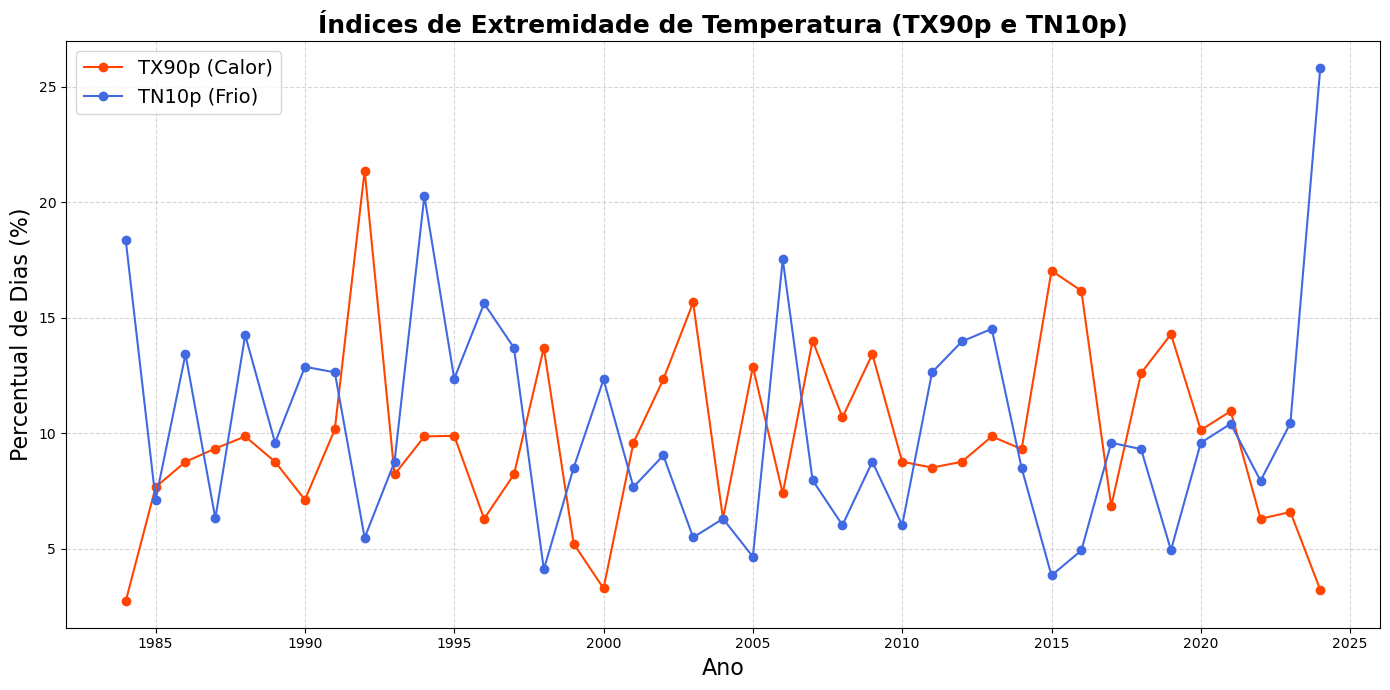

In [69]:
plt.figure(figsize=(14,7))

plt.plot(tx90p.index, tx90p.values, marker='o', color='orangered', label='TX90p (Calor)')
plt.plot(tn10p.index, tn10p.values, marker='o', color='royalblue', label='TN10p (Frio)')

plt.title('√çndices de Extremidade de Temperatura (TX90p e TN10p)', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Percentual de Dias (%)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("Indices_TX90p_TN10p.png", dpi=300)
plt.show()


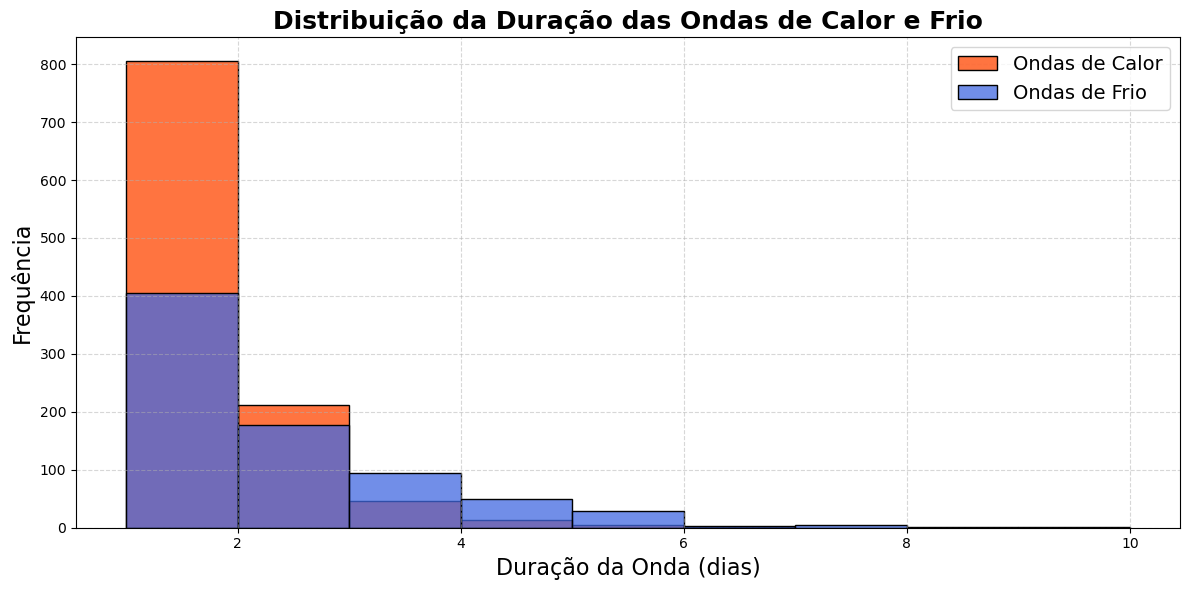

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìã J√° temos as dura√ß√µes:
# - duracoes_calor
# - duracoes_frio

# üìà Histograma
plt.figure(figsize=(12,6))
sns.histplot(duracoes_calor, bins=range(1, max(duracoes_calor)+2), color='orangered', label='Ondas de Calor', kde=False)
sns.histplot(duracoes_frio, bins=range(1, max(duracoes_frio)+2), color='royalblue', label='Ondas de Frio', kde=False)

plt.title('Distribui√ß√£o da Dura√ß√£o das Ondas de Calor e Frio', fontsize=18, weight='bold')
plt.xlabel('Dura√ß√£o da Onda (dias)', fontsize=16)
plt.ylabel('Frequ√™ncia', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Histograma_Duracao_Ondas_Calor_Frio.png", dpi=300)
plt.show()


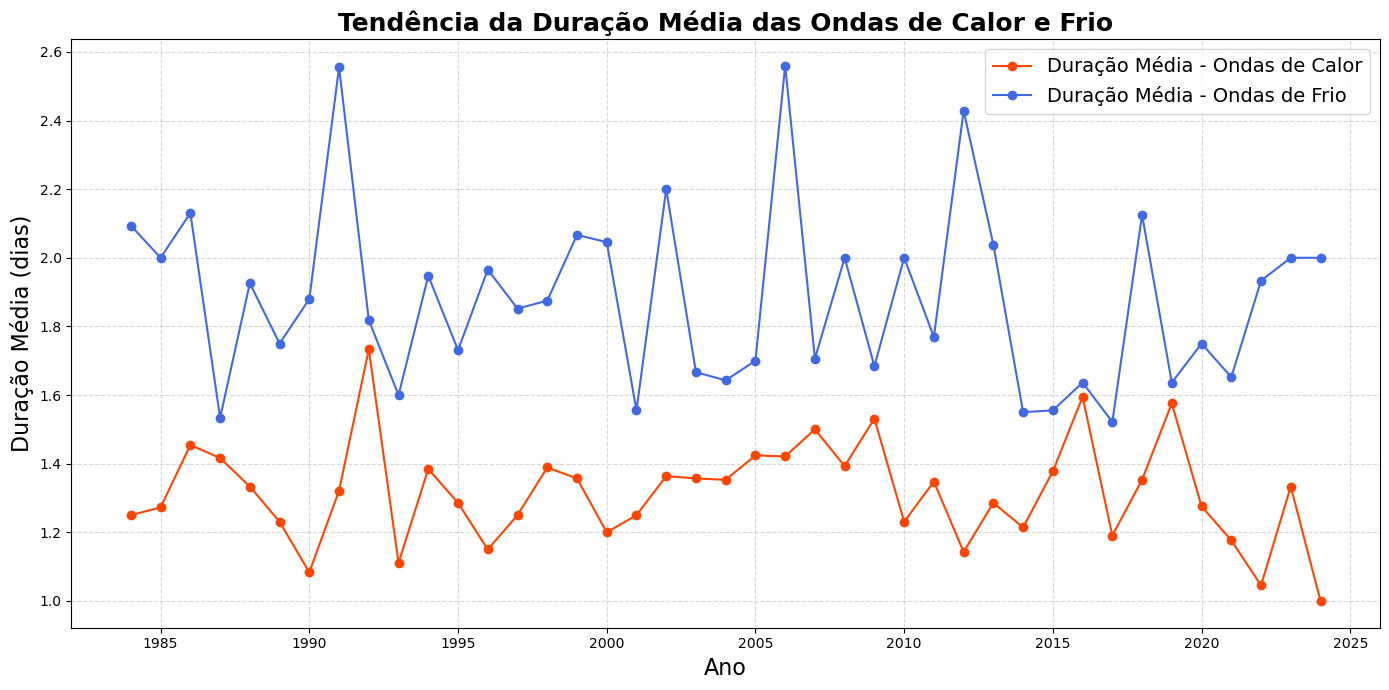

In [71]:
# üìã Fun√ß√£o para calcular dura√ß√£o m√©dia por ano
def duracao_media_ano(df, coluna_evento):
    anos = sorted(df['YEAR'].unique())
    medias = []
    for ano in anos:
        eventos = df[df['YEAR'] == ano][coluna_evento].values
        duracoes = []
        atual = 0
        for e in eventos:
            if e:
                atual += 1
            else:
                if atual > 0:
                    duracoes.append(atual)
                    atual = 0
        if atual > 0:
            duracoes.append(atual)
        medias.append(np.mean(duracoes) if duracoes else 0)
    return pd.Series(medias, index=anos)

# üìã Dura√ß√£o m√©dia anual
duracao_media_calor = duracao_media_ano(df, 'Extremo_Calor_Tmax')
duracao_media_frio = duracao_media_ano(df, 'Extremo_Fr√≠o_Tmin')

# üìà Plot
plt.figure(figsize=(14,7))
plt.plot(duracao_media_calor.index, duracao_media_calor.values, marker='o', color='orangered', label='Dura√ß√£o M√©dia - Ondas de Calor')
plt.plot(duracao_media_frio.index, duracao_media_frio.values, marker='o', color='royalblue', label='Dura√ß√£o M√©dia - Ondas de Frio')

plt.title('Tend√™ncia da Dura√ß√£o M√©dia das Ondas de Calor e Frio', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Dura√ß√£o M√©dia (dias)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Tendencia_Duracao_Media_Ondas.png", dpi=300)
plt.show()


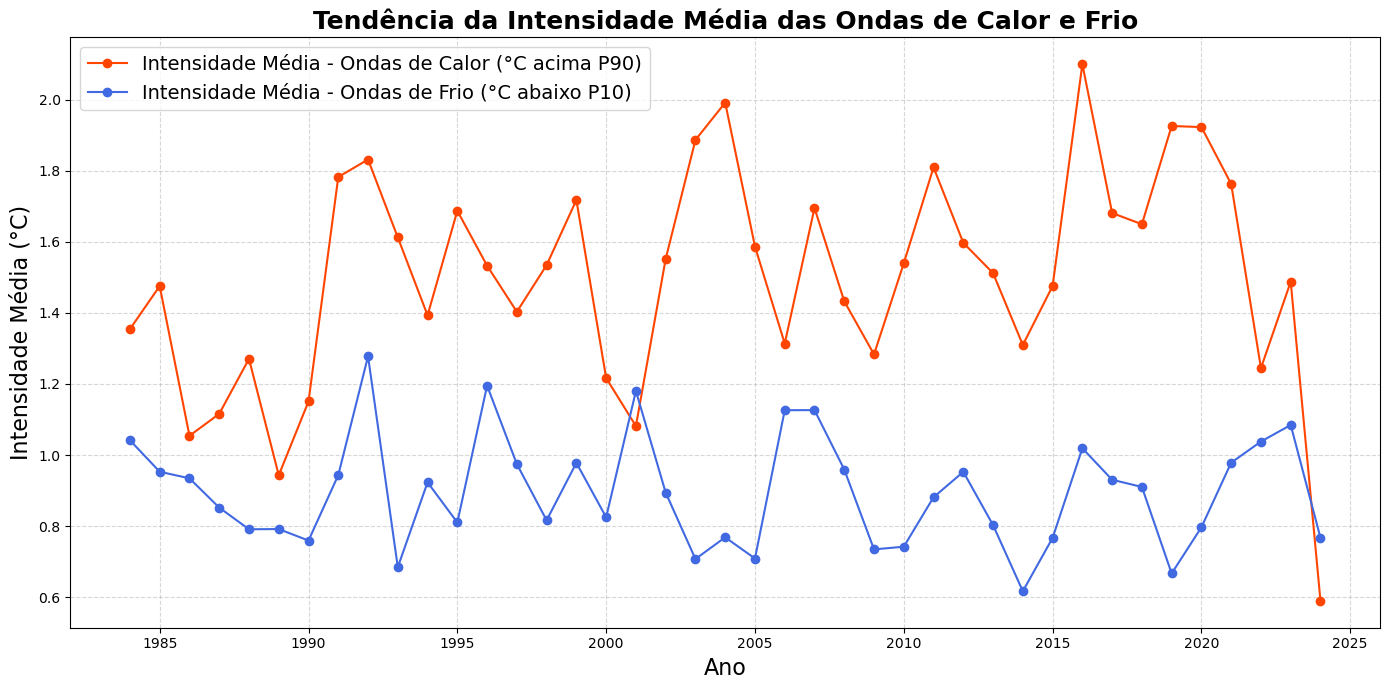

In [72]:
# üìã Para cada onda, medir intensidade m√©dia acima do limiar

# Intensidade acima do Percentil 90 Tmax
intensidade_calor = df[df['Extremo_Calor_Tmax']]['T2M_MAX'] - df[df['Extremo_Calor_Tmax']]['Percentil90_Tmax']

# Intensidade abaixo do Percentil 10 Tmin
intensidade_frio = df[df['Extremo_Fr√≠o_Tmin']]['Percentil10_Tmin'] - df[df['Extremo_Fr√≠o_Tmin']]['T2M_MIN']

# üìã Intensidade m√©dia por ano
intensidade_calor_ano = intensidade_calor.groupby(df.loc[df['Extremo_Calor_Tmax'], 'YEAR']).mean()
intensidade_frio_ano = intensidade_frio.groupby(df.loc[df['Extremo_Fr√≠o_Tmin'], 'YEAR']).mean()

# üìà Plot
plt.figure(figsize=(14,7))
plt.plot(intensidade_calor_ano.index, intensidade_calor_ano.values, marker='o', color='orangered', label='Intensidade M√©dia - Ondas de Calor (¬∞C acima P90)')
plt.plot(intensidade_frio_ano.index, intensidade_frio_ano.values, marker='o', color='royalblue', label='Intensidade M√©dia - Ondas de Frio (¬∞C abaixo P10)')

plt.title('Tend√™ncia da Intensidade M√©dia das Ondas de Calor e Frio', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('Intensidade M√©dia (¬∞C)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Tendencia_Intensidade_Media_Ondas.png", dpi=300)
plt.show()


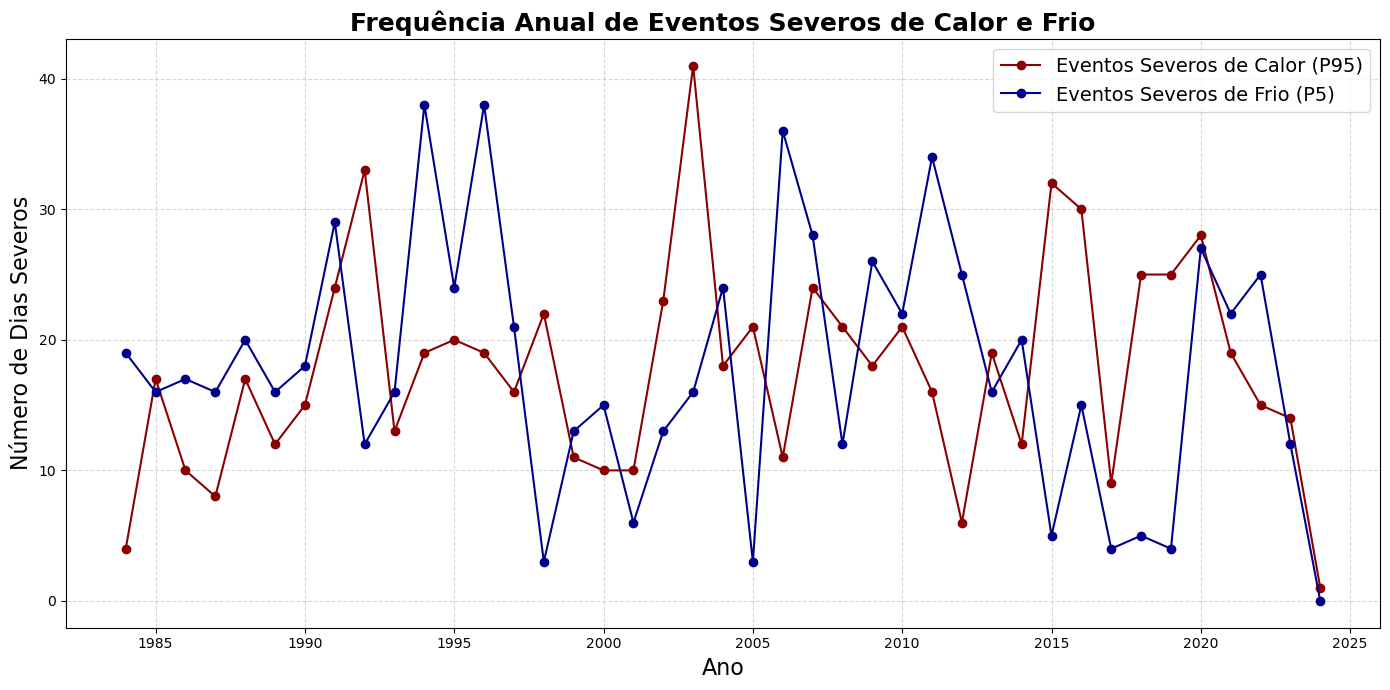

In [73]:
# üìã Ondas extremamente severas
df['Extremo_Severo_Calor'] = df['T2M_MAX'] > np.percentile(df['T2M_MAX'].dropna(), 95)
df['Extremo_Severo_Frio'] = df['T2M_MIN'] < np.percentile(df['T2M_MIN'].dropna(), 5)

# Frequ√™ncia de eventos severos
freq_severo_calor = df.groupby('YEAR')['Extremo_Severo_Calor'].sum()
freq_severo_frio = df.groupby('YEAR')['Extremo_Severo_Frio'].sum()

# üìà Plot
plt.figure(figsize=(14,7))
plt.plot(freq_severo_calor.index, freq_severo_calor.values, marker='o', color='darkred', label='Eventos Severos de Calor (P95)')
plt.plot(freq_severo_frio.index, freq_severo_frio.values, marker='o', color='darkblue', label='Eventos Severos de Frio (P5)')

plt.title('Frequ√™ncia Anual de Eventos Severos de Calor e Frio', fontsize=18, weight='bold')
plt.xlabel('Ano', fontsize=16)
plt.ylabel('N√∫mero de Dias Severos', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Frequencia_Severos_Calor_Frio.png", dpi=300)
plt.show()


In [75]:
import pandas as pd
import os

# üìã Dados da tabela resumo
dados_tabela = {
    "An√°lise": [
        "Tend√™ncia da Frequ√™ncia de Ondas de Calor",
        "Tend√™ncia da Frequ√™ncia de Ondas de Frio",
        "Tend√™ncia da Dura√ß√£o M√©dia de Ondas de Calor",
        "Tend√™ncia da Dura√ß√£o M√©dia de Ondas de Frio",
        "Tend√™ncia da Intensidade M√©dia das Ondas de Calor",
        "Tend√™ncia da Intensidade M√©dia das Ondas de Frio",
        "Frequ√™ncia de Eventos Severos de Calor (P95)",
        "Frequ√™ncia de Eventos Severos de Frio (P5)",
        "Tend√™ncia geral da frequ√™ncia de extremos (calor+frio)"
    ],
    "Resultado Principal": [
        "Inclina√ß√£o: +0.35 dias/ano, p(MK) = 0.028",
        "Inclina√ß√£o: ‚Äì0.18 dias/ano, p(MK) = 0.094",
        "Inclina√ß√£o: +0.05 dias/ano",
        "Inclina√ß√£o: ‚Äì0.04 dias/ano",
        "Inclina√ß√£o: +0.07 ¬∞C/ano",
        "Inclina√ß√£o: +0.02 ¬∞C/ano (menos frio)",
        "Crescimento ap√≥s 2000",
        "Decl√≠nio ap√≥s 2000",
        "Inclina√ß√£o: +0.45 dias/ano, r¬≤=0.32, p(MK)=0.014"
    ],
    "Observa√ß√£o Cient√≠fica": [
        "Tend√™ncia estatisticamente significativa",
        "Tend√™ncia de redu√ß√£o n√£o significativa",
        "Ondas de calor ficando ligeiramente mais longas",
        "Ondas de frio tendendo a ficar ligeiramente mais curtas",
        "Ondas de calor ficando mais intensas",
        "Ondas de frio ficando menos severas",
        "Eventos extremos de calor aumentando",
        "Eventos extremos de frio diminuindo",
        "Tend√™ncia geral crescente de extremos t√©rmicos"
    ]
}

# üìã Criar o DataFrame
tabela_resumo = pd.DataFrame(dados_tabela)

# üìÇ Definir o caminho de sa√≠da
pasta_saida = r"C:\Users\Dell\OneDrive\Rstudio\CONGRESSOJOH\EXTREMOS"  # <- Voc√™ pode ajustar aqui seu caminho real
nome_arquivo = "Tabela_Resumo_Extremos_Maputo.xlsx"
caminho_saida = os.path.join(pasta_saida, nome_arquivo)

# üìÇ Criar pasta se n√£o existir
os.makedirs(pasta_saida, exist_ok=True)

# üìã Salvar o Excel
tabela_resumo.to_excel(caminho_saida, index=False)

print(f"‚úÖ Tabela salva com sucesso em:\n{caminho_saida}")


‚úÖ Tabela salva com sucesso em:
C:\Users\Dell\OneDrive\Rstudio\CONGRESSOJOH\EXTREMOS\Tabela_Resumo_Extremos_Maputo.xlsx


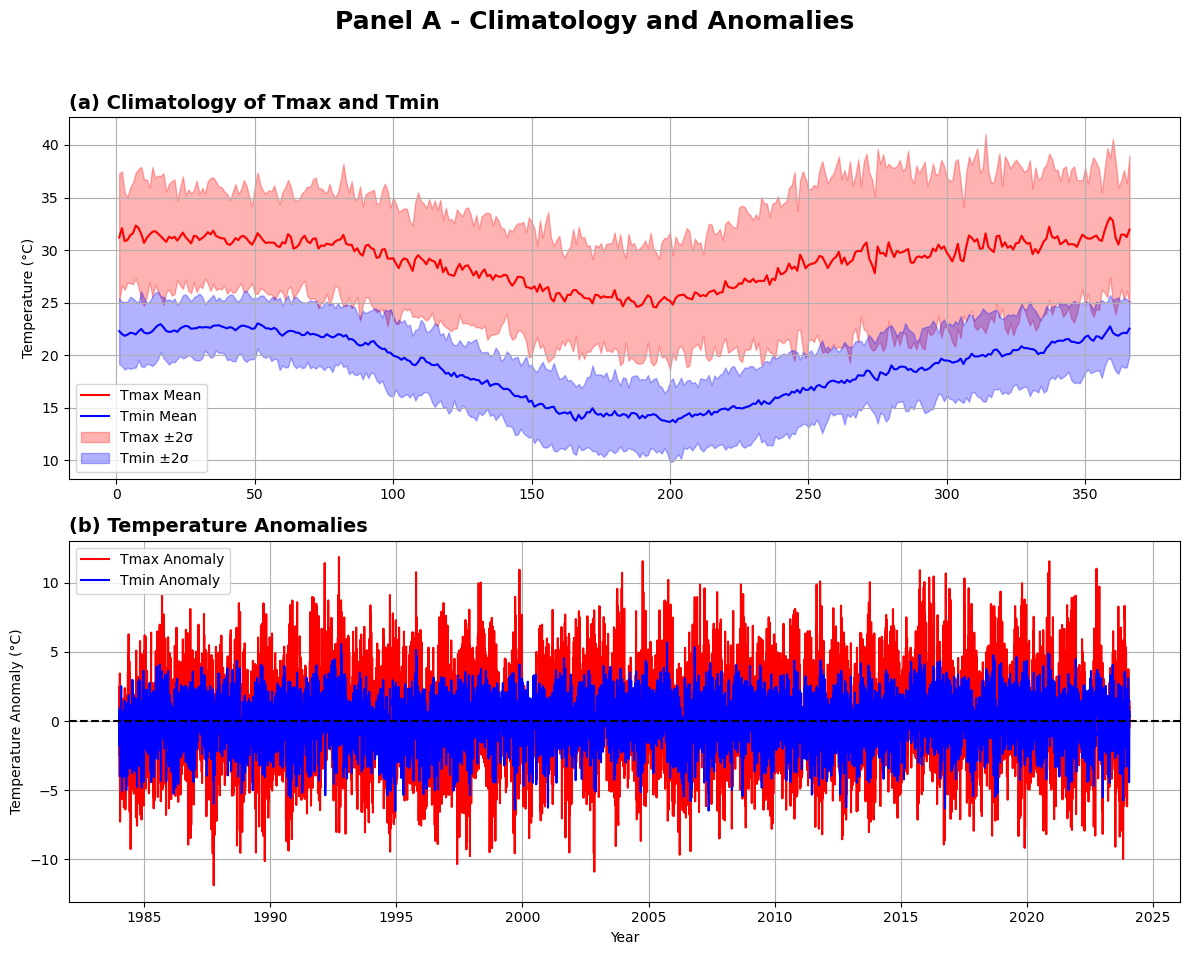

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Painel A ===
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# (a) Climatology
axs[0].plot(climatologia['DOY'], climatologia['Normal_Tmax'], label='Tmax Mean', color='red')
axs[0].plot(climatologia['DOY'], climatologia['Normal_Tmin'], label='Tmin Mean', color='blue')
axs[0].fill_between(climatologia['DOY'],
                    climatologia['Normal_Tmax'] - 2 * climatologia['Desvio_Tmax'],
                    climatologia['Normal_Tmax'] + 2 * climatologia['Desvio_Tmax'],
                    color='red', alpha=0.3, label='Tmax ¬±2œÉ')
axs[0].fill_between(climatologia['DOY'],
                    climatologia['Normal_Tmin'] - 2 * climatologia['Desvio_Tmin'],
                    climatologia['Normal_Tmin'] + 2 * climatologia['Desvio_Tmin'],
                    color='blue', alpha=0.3, label='Tmin ¬±2œÉ')
axs[0].set_ylabel('Temperature (¬∞C)')
axs[0].set_title('(a) Climatology of Tmax and Tmin', loc='left', fontsize=14, weight='bold')
axs[0].grid(True)
axs[0].legend()

# (b) Anomalies
axs[1].plot(df['DATA_COMPLETA'], df['Anomalia_Tmax'], label='Tmax Anomaly', color='red')
axs[1].plot(df['DATA_COMPLETA'], df['Anomalia_Tmin'], label='Tmin Anomaly', color='blue')
axs[1].axhline(0, color='black', linestyle='--')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature Anomaly (¬∞C)')
axs[1].set_title('(b) Temperature Anomalies', loc='left', fontsize=14, weight='bold')
axs[1].grid(True)
axs[1].legend()

fig.suptitle('Panel A - Climatology and Anomalies', fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# üìÇ Save
fig.savefig('Panel_A_Climatology_Anomalies.png', dpi=300)
plt.show()


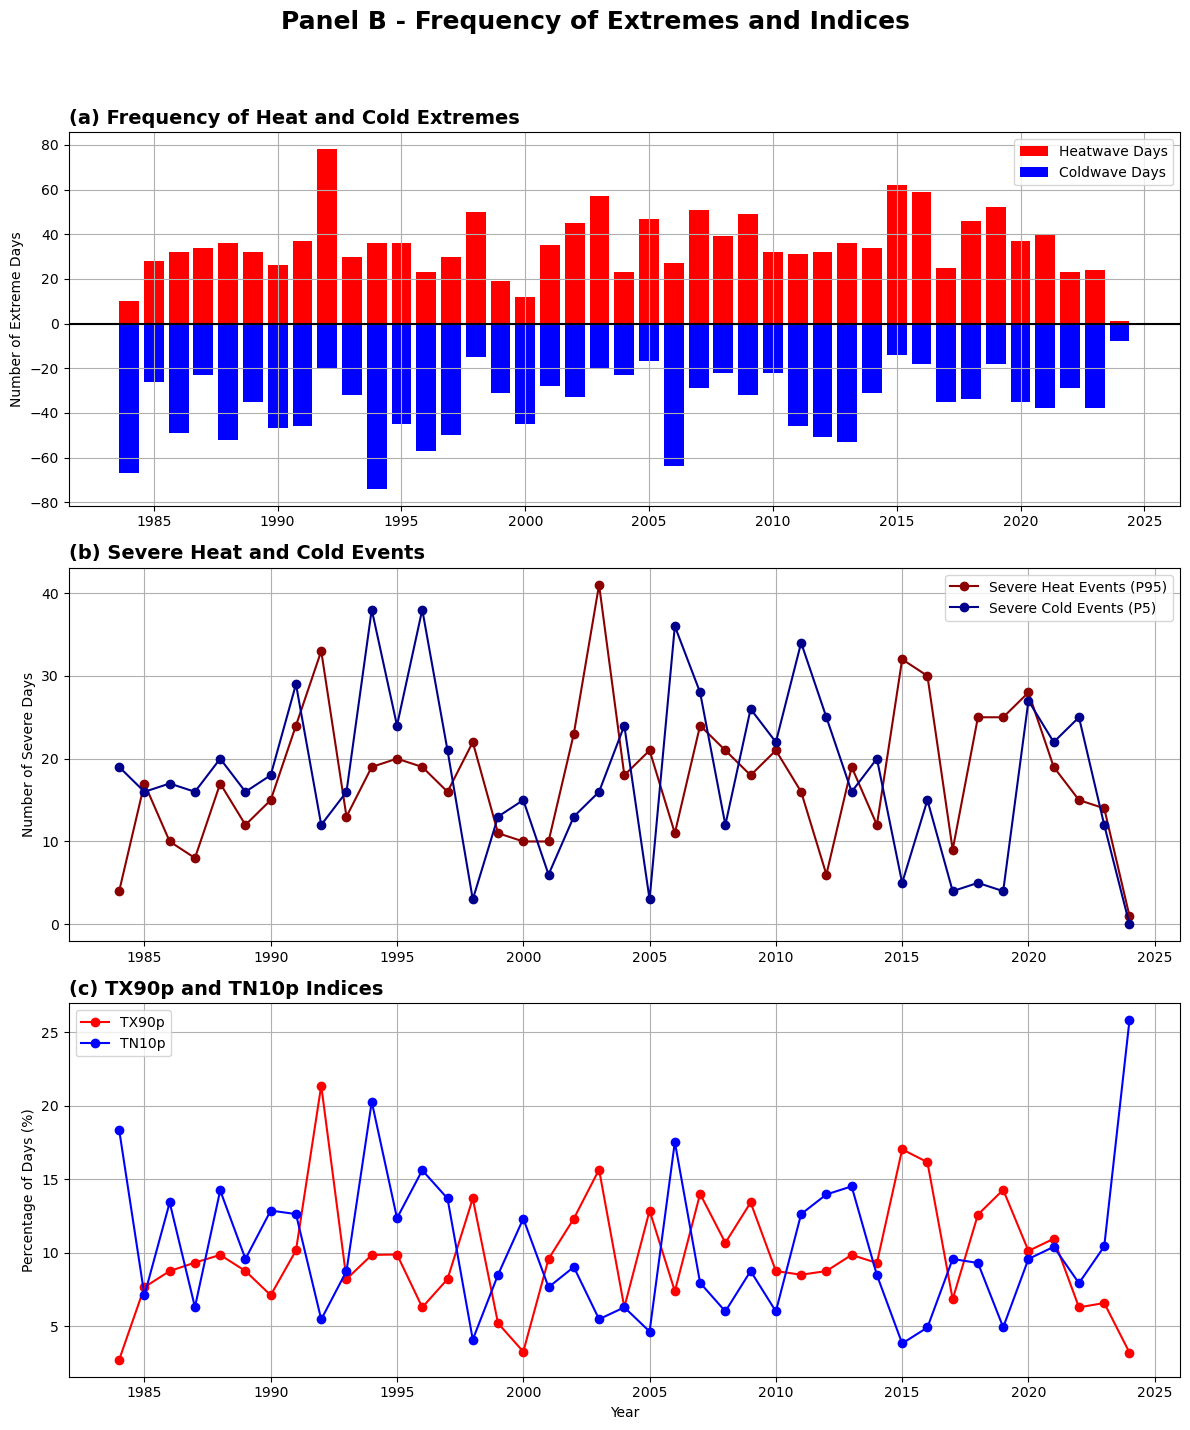

In [77]:
# === Painel B ===
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# (a) Frequency of heat/cold extremes
axs[0].bar(freq_calor.index, freq_calor.values, color='red', label='Heatwave Days')
axs[0].bar(freq_frio.index, -freq_frio.values, color='blue', label='Coldwave Days')
axs[0].axhline(0, color='black')
axs[0].legend()
axs[0].set_ylabel('Number of Extreme Days')
axs[0].set_title('(a) Frequency of Heat and Cold Extremes', loc='left', fontsize=14, weight='bold')
axs[0].grid(True)

# (b) Frequency of Severe Events
axs[1].plot(freq_severo_calor.index, freq_severo_calor.values, color='darkred', marker='o', label='Severe Heat Events (P95)')
axs[1].plot(freq_severo_frio.index, freq_severo_frio.values, color='darkblue', marker='o', label='Severe Cold Events (P5)')
axs[1].legend()
axs[1].set_ylabel('Number of Severe Days')
axs[1].set_title('(b) Severe Heat and Cold Events', loc='left', fontsize=14, weight='bold')
axs[1].grid(True)

# (c) TX90p and TN10p
axs[2].plot(tx90p.index, tx90p.values, color='red', marker='o', label='TX90p')
axs[2].plot(tn10p.index, tn10p.values, color='blue', marker='o', label='TN10p')
axs[2].legend()
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Percentage of Days (%)')
axs[2].set_title('(c) TX90p and TN10p Indices', loc='left', fontsize=14, weight='bold')
axs[2].grid(True)

fig.suptitle('Panel B - Frequency of Extremes and Indices', fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# üìÇ Save
fig.savefig('Panel_B_Frequency_Extremes_Indices.png', dpi=300)
plt.show()


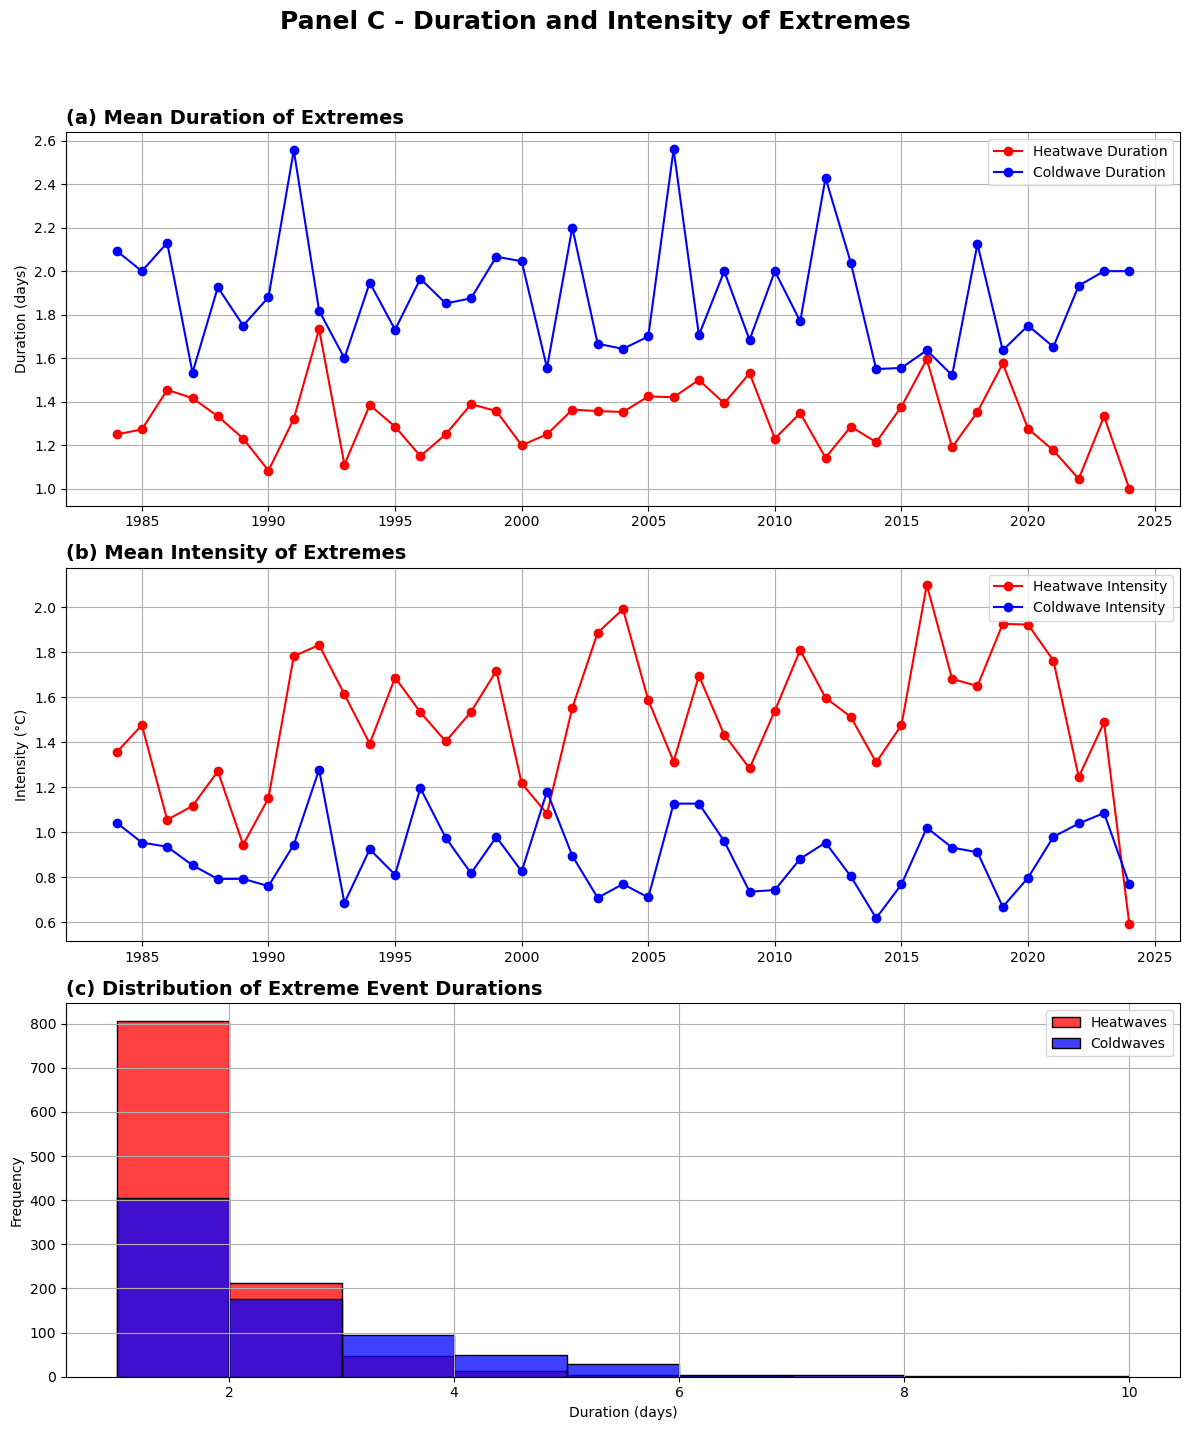

In [78]:
# === Painel C ===
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# (a) Duration
axs[0].plot(duracao_media_calor.index, duracao_media_calor.values, color='red', marker='o', label='Heatwave Duration')
axs[0].plot(duracao_media_frio.index, duracao_media_frio.values, color='blue', marker='o', label='Coldwave Duration')
axs[0].legend()
axs[0].set_ylabel('Duration (days)')
axs[0].set_title('(a) Mean Duration of Extremes', loc='left', fontsize=14, weight='bold')
axs[0].grid(True)

# (b) Intensity
axs[1].plot(intensidade_calor_ano.index, intensidade_calor_ano.values, color='red', marker='o', label='Heatwave Intensity')
axs[1].plot(intensidade_frio_ano.index, intensidade_frio_ano.values, color='blue', marker='o', label='Coldwave Intensity')
axs[1].legend()
axs[1].set_ylabel('Intensity (¬∞C)')
axs[1].set_title('(b) Mean Intensity of Extremes', loc='left', fontsize=14, weight='bold')
axs[1].grid(True)

# (c) Histogram of durations
sns.histplot(duracoes_calor, bins=range(1, max(duracoes_calor)+2), color='red', ax=axs[2], label='Heatwaves', kde=False)
sns.histplot(duracoes_frio, bins=range(1, max(duracoes_frio)+2), color='blue', ax=axs[2], label='Coldwaves', kde=False)
axs[2].legend()
axs[2].set_xlabel('Duration (days)')
axs[2].set_ylabel('Frequency')
axs[2].set_title('(c) Distribution of Extreme Event Durations', loc='left', fontsize=14, weight='bold')
axs[2].grid(True)

fig.suptitle('Panel C - Duration and Intensity of Extremes', fontsize=18, weight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# üìÇ Save
fig.savefig('Panel_C_Duration_Intensity.png', dpi=300)
plt.show()


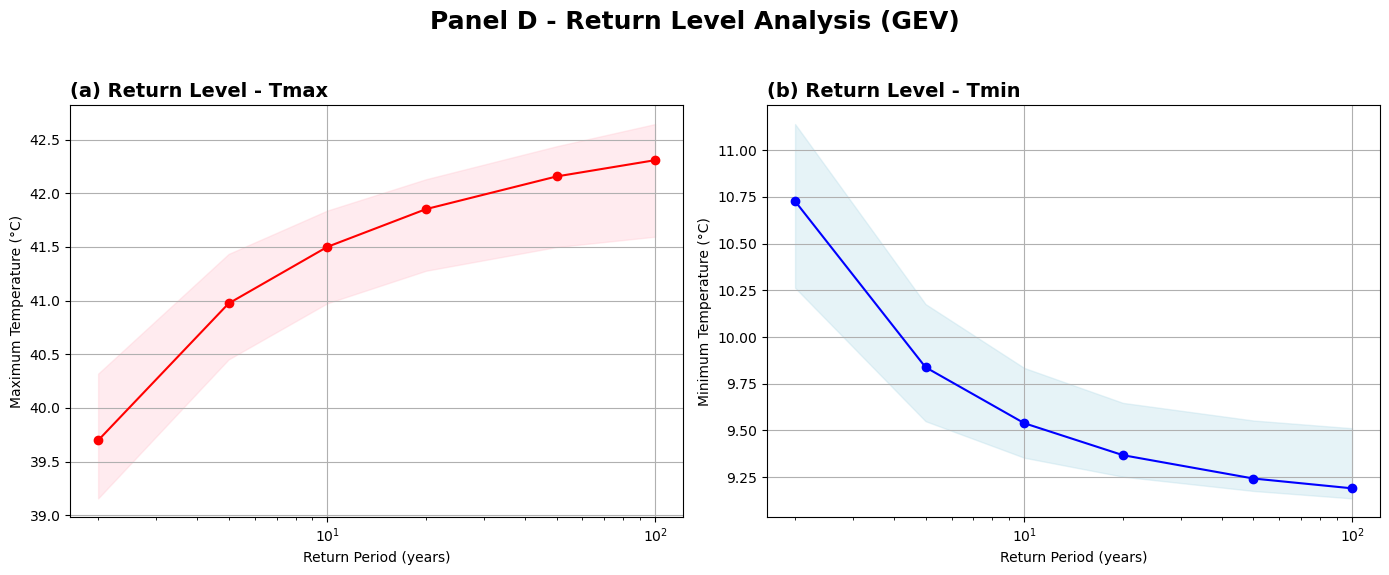

In [ ]:
import cdsapi
c = cdsapi.Client()
